In [229]:
#Load Packages

using Pkg


Pkg.add("DataFrames")
Pkg.add("Dates")
Pkg.add("Plots")
Pkg.add("CategoricalArrays")
Pkg.add("RData")
Pkg.add("Lathe")
Pkg.add("GLM") # package to run models 
Pkg.add("StatsPlots")
Pkg.add("MLBase")
Pkg.add("Tables")
Pkg.add("CovarianceMatrices") # robust standar error
Pkg.add("CSV")
Pkg.add("PyPlot")

using DataFrames
using Dates
using Plots
using Statistics,RData  #upload data of R format 
using CategoricalArrays # categorical data
using DataFrames
using CSV
using Tables
using Lathe
using GLM
using CovarianceMatrices

   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.7\Project.toml`
  No 

In [69]:
rdata_read = load("wage2015_subsample_inference.RData")
data = rdata_read["data"]
names(data)
println("Number of Rows : ", size(data)[1],"\n","Number of Columns : ", size(data)[2],) #rows and columns

Number of Rows : 5150
Number of Columns : 20


### Describing general Data

In [70]:
[eltype(col) for col = eachcol(data)] #Set data type for each column

20-element Vector{DataType}:
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 CategoricalValue{String, UInt16}
 CategoricalValue{String, UInt8}
 CategoricalValue{String, UInt8}
 CategoricalValue{String, UInt8}

In [71]:
describe(data)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,wage,23.4104,3.02198,19.2308,528.846,,,Float64
2,lwage,2.97079,1.10591,2.95651,6.2707,,,Float64
3,sex,0.444466,0.0,0.0,1.0,,,Float64
4,shs,0.023301,0.0,0.0,1.0,,,Float64
5,hsg,0.243883,0.0,0.0,1.0,,,Float64
6,scl,0.278058,0.0,0.0,1.0,,,Float64
7,clg,0.31767,0.0,0.0,1.0,,,Float64
8,ad,0.137087,0.0,0.0,1.0,,,Float64
9,mw,0.259612,0.0,0.0,1.0,,,Float64


In [72]:
#Descriptive data table of variables by sex
Z = select(data, ["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"])

data_female = filter(row -> row.sex == 1, data)
Z_female = select(data_female,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] )

data_male = filter(row -> row.sex == 0, data)
Z_male = select(data_male,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] )

means = DataFrame( variables = names(Z), All = describe(Z, :mean)[!,2], Men = describe(Z_male,:mean)[!,2], Female = describe(Z_female,:mean)[!,2])

,variables,All,Men,Female
,String,Float64,Float64,Float64
1,lwage,2.97079,2.98783,2.94948
2,sex,0.444466,0.0,1.0
3,shs,0.023301,0.0318071,0.0126693
4,hsg,0.243883,0.294303,0.180865
5,scl,0.278058,0.273331,0.283967
6,clg,0.31767,0.293953,0.347313
7,ad,0.137087,0.106606,0.175186
8,ne,0.227767,0.22195,0.235037
9,mw,0.259612,0.259,0.260376


Defining some data for future plots

In [ ]:
data_shs = filter(row -> row.shs == 1, data)
K_shs = select(data_shs,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] )

data_hsg = filter(row -> row.hsg == 1, data)
K_hsg = select(data_hsg,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] )

data_scl = filter(row -> row.scl == 1, data)
K_scl = select(data_scl,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] )

data_clg = filter(row -> row.clg == 1, data)
K_clg = select(data_clg,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] )

data_ad = filter(row -> row.ad == 1, data)
K_ad = select(data_ad,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] )

In [73]:
#Focus on the subset of college-educated workers (scl, clg variables). 
#Descriptive data table of variables by College education
C = select(data, ["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"])

data_some_college = filter(row -> row.scl == 1, data)
C_some_college = select(data_some_college,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] )

data_college = filter(row -> row.clg == 1, data)
C_college = select(data_college,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] )

means = DataFrame( variables = names(C), All = describe(C, :mean)[!,2], Some_College = describe(C_some_college,:mean)[!,2], College_Grad = describe(C_college,:mean)[!,2])


,variables,All,Some_College,College_Grad
,String,Float64,Float64,Float64
1,lwage,2.97079,2.84734,3.13367
2,sex,0.444466,0.453911,0.485941
3,shs,0.023301,0.0,0.0
4,hsg,0.243883,0.0,0.0
5,scl,0.278058,1.0,0.0
6,clg,0.31767,0.0,1.0
7,ad,0.137087,0.0,0.0
8,ne,0.227767,0.186453,0.261614
9,mw,0.259612,0.305866,0.231051


In [74]:
# Differences
# Difference in completed college v. some college workers

diff_mean = mean(data_college[:,:lwage]) - mean(data_some_college[:,:lwage])
diff_perc = round(diff_mean*100,digits=2)
println("Comparing by means, being a completed college workers brings ", diff_perc , "% more salary than a some college worker")

Comparing by means, being a completed college workers brings 28.63% more salary than a some college worker


Comparing the means on both variables might be insuficient.
### Selecting variables of interest

In [76]:
#Some college and complete college
data_comp = filter(row ->(row.scl == 1 || row.clg == 1), data)

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,9.61538,2.26336,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,48.0769,3.8728,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,28.8462,3.36198,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,11.7308,2.46222,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,19.2308,2.95651,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,12.0192,2.48651,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,13.4615,2.59984,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8,16.3462,2.79399,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,8.65385,2.158,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Now lets look at the wage gap in this new group


In [83]:
K = select(data_comp, ["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"])

data_female = filter(row -> row.sex == 1, data_comp)
K_female = select(data_female,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] )

data_male = filter(row -> row.sex == 0, data_comp)
K_male = select(data_male,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] )

means = DataFrame( variables = names(Z), All = describe(Z, :mean)[!,2], Men = describe(Z_male,:mean)[!,2], Female = describe(Z_female,:mean)[!,2])

diff_coll =  mean(K_male[:,:lwage]) - mean(K_female[:,:lwage])
diff_college = round(diff_coll*100,digits=2)
println("Comparing by means, College educated  males have ", diff_college , "% more salary than a some college educated females")

College educated  males have 8.15% more salary than a some college educated females


## Regresions
No control

In [86]:
nocontrol_model = lm(@formula(lwage ~ sex), data_comp)
nocontrol_est = GLM.coef(nocontrol_model)[2]
nocontrol_se = GLM.coeftable(nocontrol_model).cols[2][2]
nocontrol_se1 = stderror(HC1(), nocontrol_model)[2] #Test de white que indica robustes
println("The estimated gender coefficient is ", nocontrol_est ," and the corresponding robust standard error is " ,nocontrol_se1)

The estimated gender coefficient is -0.08150855508735176 and the corresponding robust standard error is 0.019586032782704106


Control Model


In [88]:
flex = @formula(lwage ~ sex + (exp1+exp2+exp3+exp4) * (shs+hsg+scl+clg+occ2+ind2+mw+so+we))#regresion del modelo con sus explicativas
control_model = lm(flex , data_comp) #interacciones entre variables

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

lwage ~ 1 + sex + exp1 + exp2 + exp3 + exp4 + shs + hsg + scl + clg + occ2 + ind2 + mw + so + we + exp1 & shs + exp1 & hsg + exp1 & scl + exp1 & clg + exp1 & occ2 + exp1 & ind2 + exp1 & mw + exp1 & so + exp1 & we + exp2 & shs + exp2 & hsg + exp2 & scl + exp2 & clg + exp2 & occ2 + exp2 & ind2 + exp2 & mw + exp2 & so + exp2 & we + exp3 & shs + exp3 & hsg + exp3 & scl + exp3 & clg + exp3 & occ2 + exp3 & ind2 + exp3 & mw + exp3 & so + exp3 & we + exp4 & shs + exp4 & hsg + exp4 & scl + exp4 & clg + exp4 & occ2 + exp4 & ind2 + exp4 & mw + exp4 & so + exp4 & we

Coefficients:
────────────────────────────────────────────────────────────────────────────────────────
                        Coef.   Std. Error       t  Pr(>|t|)    Lower 95%      Upper 95%
────────────────────────────────────────────────────────────────────

In [89]:
control_est = GLM.coef(control_model)[2]

-0.05306234034443254

In [90]:
control_se = GLM.coeftable(control_model).cols[2][2]

0.019353192558238336

In [91]:
control_se1 = stderror( HC0(), control_model)[2]

NaN

In [92]:
control_se1 = 0.01835284965322306

0.01835284965322306

In [93]:
println("Coefficient for OLS with controls " , control_est, " robust standard error:", control_se1)
#REVISAR NOMBRE DE VARIABLES

Coefficient for OLS with controls -0.05306234034443254 robust standard error:0.01835284965322306


In [94]:
#Partialing-out
flex_y = @formula(lwage ~ (exp1+exp2+exp3+exp4) * (shs+hsg+scl+clg+occ2+ind2+mw+so+we))
flex_d = @formula(sex ~ (exp1+exp2+exp3+exp4) * (shs+hsg+scl+clg+occ2+ind2+mw+so+we))

# partialling-out the linear effect of W from Y
t_Y = residuals(lm(flex_y, data_comp))

# partialling-out the linear effect of W from D
t_D = residuals(lm(flex_d, data_comp))

#set residuals as DataFram
data_res = DataFrame(t_Y = t_Y, t_D = t_D )
# regression of Y on D after partialling-out the effect of W

partial_fit = lm(@formula(t_Y ~ t_D), data_res) #Partialling out model (regress of errors)

partial_est = GLM.coef(partial_fit)[2]  #[1] seria el intercepto del coef y [2] el intersepto de sexo

# standard error 
partial_se = GLM.coeftable(partial_fit).cols[2][2] #se bellow why [2]
# standard error robust white test
partial_se1 = stderror( HC0(), partial_fit)[2]

#condifence interval
GLM.confint(partial_fit)[2,:]

2-element Vector{Float64}:
 -0.08957069899693047
 -0.016553981718576957

In [95]:
println("Coefficient for D via partiallig-out ", partial_est, " robust standard error:", partial_se1 )

Coefficient for D via partiallig-out -0.053062340357753715 robust standard error:0.01835284965322306


In [96]:
DataFrame(modelos = [ "Without controls", "full reg", "partial reg" ], 
Estimate = [nocontrol_est,control_est, partial_est], 
StdError = [nocontrol_se1,control_se1, partial_se1])

,modelos,Estimate,StdError
,String,Float64,Float64
1,Without controls,-0.0815086,0.019586
2,full reg,-0.0530623,0.0183528
3,partial reg,-0.0530623,0.0183528


In [18]:
pyplot()

Plots.PyPlotBackend()

In [19]:
using Plots

In [174]:
using StatsPlots # Required for the DataFrame user recipe
using DataFrames
df = DataFrame(data_comp)

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,9.61538,2.26336,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,48.0769,3.8728,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,28.8462,3.36198,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,11.7308,2.46222,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,19.2308,2.95651,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,12.0192,2.48651,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,13.4615,2.59984,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8,16.3462,2.79399,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,8.65385,2.158,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Plots

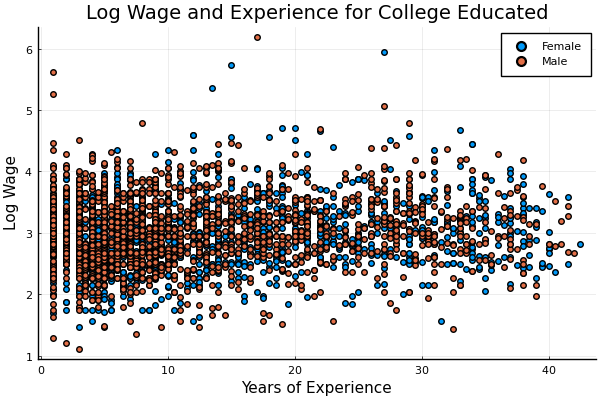

In [215]:
SCplot = scatter(K_female.exp1,K_female.lwage, title = "Log Wage and Experience for College Educated",
    xlabel = "Years of Experience", ylabel = "Log Wage", label="Female",legend = true)
scatter!(K_male.exp1,K_male.lwage, label = "Male")

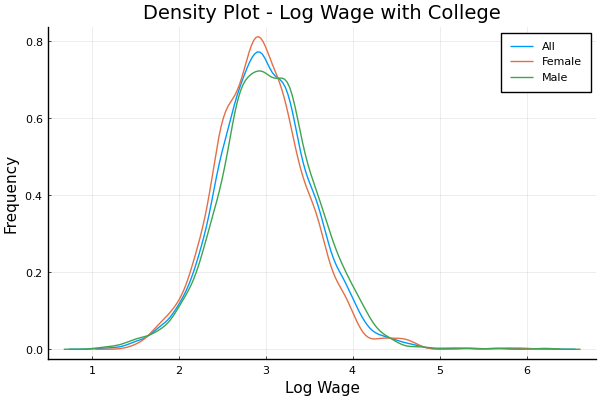

In [163]:
Dplot = density(df.lwage, title = "Density Plot - Log Wage with College",
    ylabel = "Frequency", xlabel = "Log Wage",label = "All", legend = true)
density!(K_female.lwage, label = "Female" )
density!(K_male.lwage, label = "Male")

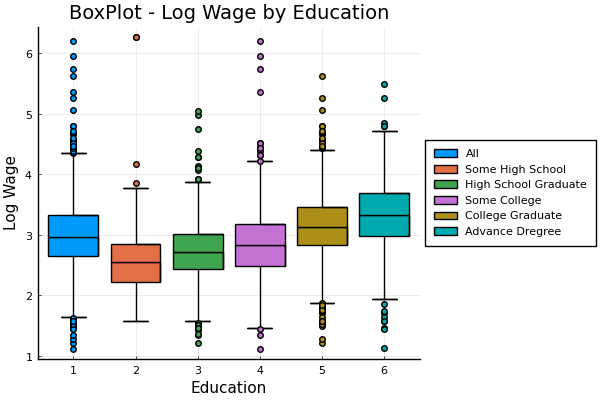

In [219]:
Bplot = boxplot(df.lwage, title = "BoxPlot - Log Wage by Education",
    ylabel = "Log Wage", xlabel = "Education",label = "All", legend =:outerright )
boxplot!(K_shs.lwage, label = "Some High School" )
boxplot!(K_hsg.lwage, label = "High School Graduate")
boxplot!(K_scl.lwage, label = "Some College")
boxplot!(K_clg.lwage, label = "College Graduate")
boxplot!(K_ad.lwage, label = "Advance Dregree")

In [231]:
plot(lwage,K_scl)

LoadError: UndefVarError: plot not defined